# New Classes definition

Devo pensare ad un nuovo modo di implementare le classi
procedure sono:
- acquisizione del dataset raw (start,stop,cadence,shape)
- pipeline process (start,partialStore,LoS)
- cropping (crop, raw or processed data)
- packing crea copia del dataseta a 16 bit (RTE gia\` a 16 bit)
- extracting (non implementare per ora)
- compression (bitdepth)
- flushing (start,stop,data_vol)

Potrei creare una classe per ogni modalita\`, dentro ogni classe inserisco le funzioni (ma sarebbero tutte uguali).<br>
Mantengo le differenze come ora, ma tolgo molti valori iniziali e faccio partire il tutto dalle classi PHI\_\*\_MODE le funzioni poi avranno molti piu\` flag in modo da gestire meglio le differenze. Non serve avere tutte le differenze dei modi, comode per avere i valori iniziali, ma niente di piu\` (per quello potrei creare una funzione che me li genera dandogli il PHI\_\*\_MODE corrispondente). Con le delle sub-instances dovrebbe essere piu\` facile.<br>
- self.raw
- self.raw.crop
- self.raw.pack
- self.raw.crop.pack --> NO!
- self.proc
- self.proc.crop
- self.compr
- self.compr.crop
- self.compr.pack<br>

Telemetry will drop down at mid-March.<br>
7/3/2022 Conjuction<br>
26/3/2022 Perihelion (0.32 AU)<br>
29/3/2022 Earth Quadrature<br>


In [4]:
from DClibs.TM_SOPHI import *

In [133]:
t0 = datetime.datetime.fromisoformat('2022-02-01T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-02-01T00:02:10')
a0 = PHI_MODE('HRT')
kw = a0.observation(t0,t1,cadence=1,shape=(768,2048,1,6)); phi.saving(1,**kw)

t0 = a0.raw.end
kw = a0.cropping(t0,ndata=-1,crop=[1,2048/756],level='raw'); phi.saving(1,**kw)
kw = a0.packing(t0,ndata=-1,level='raw.crop'); phi.saving(1,**kw)
kw = a0.compressing(a0.raw.crop.end, nbits = 4, ndata = -1,level='raw.pack'); phi.saving(1,**kw)

a0.compr.pack.data

3.683648

In [1]:
2*(768*2048*1*6*4/(2048/756) /8 /1e6 + 0.1)


3039.09888

# Global Helioseismology +
Raw data, 4 polarimetric states, disk centre, 1024x1024 px, 800 datasets (13 hours and 20 minutes at 1 min cadence).<br>
Duration could be less, but at least 6 hours.<br>
Field of view could be reduced to 512x512 px. <br>
Mandatory: 4 polarimetric states, 1 min cadence, raw data (it depends on cruise phase results)

amount of compressed data + metadata: 15179.5 MB
number of datasets: 800


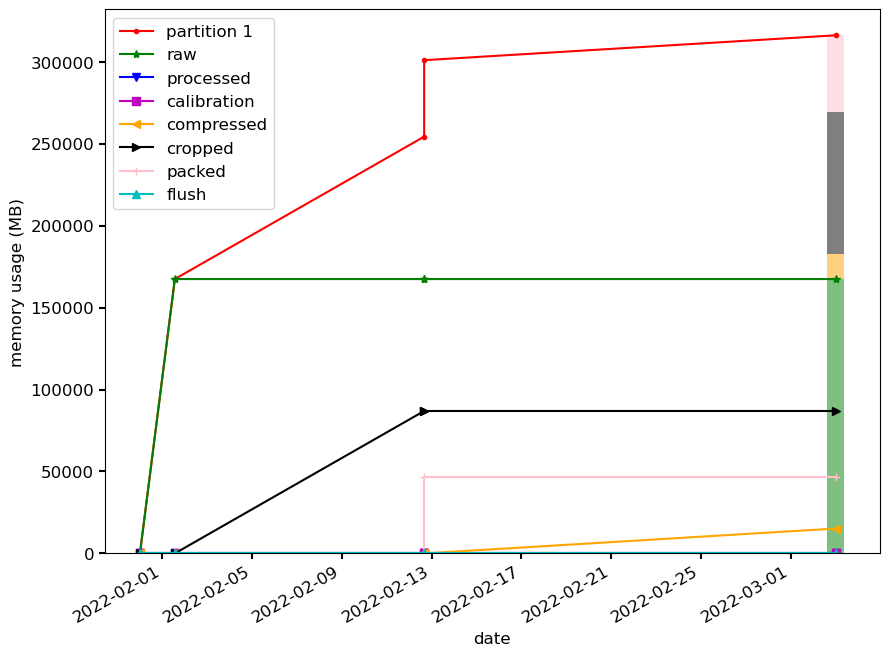

In [2]:
phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-01-31T00:00:00'))

#High cadence, 4 days, helio
t0 = datetime.datetime.fromisoformat('2022-02-01T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-02-01T13:20:00')
a0 = PHI_MODE('HRT')
kw = a0.observation(t0,t1,cadence=1,shape=(1024,2048,4,6)); phi.saving(1,**kw)

t0 = a0.raw.end
kw = a0.cropping(t0,ndata=-1,crop=[1,2],level='raw'); phi.saving(1,**kw)
kw = a0.packing(t0,ndata=-1,level='raw.crop'); phi.saving(1,**kw)

kw = a0.compressing(a0.raw.crop.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(1,**kw)

print('amount of compressed data + metadata:',round(phi.part1.compr,1), 'MB')
print('number of datasets:',a0.raw.n_datasets)
phi.plot(1,bar=True)

In [234]:
720/60

12.0

# Cross-Calibration campaign
<img src="files/Screenshot.png">

In [148]:
data_vol/1.75*0.25

4529.84832

amount of compressed data + metadata: 12700.4 MB
number of datasets: 168
amount of compressed calibration data:  3397.4 MB


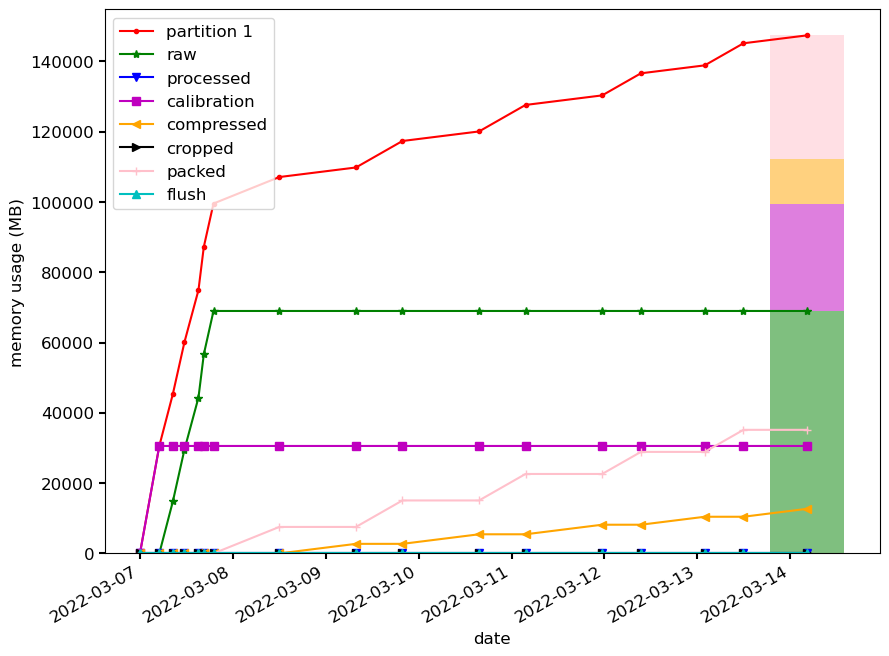

In [159]:
phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-07T00:00:00'))

#45 full raw datasets, packed and compressed to 6 bits (no metadata included)
t0 = datetime.datetime.fromisoformat('2022-03-07T00:30:00')
t1 = datetime.datetime.fromisoformat('2022-03-07T05:00:00')
c = PHI_MODE('CAL')
data_vol = 2048*2048*24*32/8e6 *(32+16+6)/32 * 45
kw = c.calibration(t0,t1,data_vol); phi.saving(1,**kw)

#Medium cadence, High res, 2-5 min, 3 quantities
t0 = datetime.datetime.fromisoformat('2022-03-07T05:30:00')
t1 = t0 + datetime.timedelta(hours=3)
a0 = PHI_MODE('HRT')
kw = a0.observation(t0,t1,cadence=5,shape=(2048,2048,4,6)); phi.saving(1,**kw)

#High cadence, High res
t0 = datetime.datetime.fromisoformat('2022-03-07T08:30:00')
t1 = t0 + datetime.timedelta(hours=3)
a1 = PHI_MODE('HRT')
kw = a1.observation(t0,t1,cadence=5,shape=(2048,2048,4,6)); phi.saving(1,**kw)

# TBD mosaic. Cadence = 6 minutes, full size, 25 or 36 datasets
t0 = datetime.datetime.fromisoformat('2022-03-07T11:30:00')
t1 = t0 + datetime.timedelta(minutes=217) #36 datasets
a2 = PHI_MODE('HRT')
kw = a2.observation(t0,t1,cadence=6,shape=(2048,2048,4,6)); phi.saving(1,**kw)

#high cadence, high res
t0 = datetime.datetime.fromisoformat('2022-03-07T16:00:00')
t1 = t0 + datetime.timedelta(minutes=30)
a3 = PHI_MODE('HRT')
kw = a3.observation(t0,t1,cadence=1,shape=(2048,2048,4,6)); phi.saving(1,**kw)

#low cadence, high res
t0 = datetime.datetime.fromisoformat('2022-03-07T16:30:00')
t1 = t0 + datetime.timedelta(hours=2,minutes=30)
a4 = PHI_MODE('HRT')
kw = a4.observation(t0,t1,cadence=5,shape=(2048,2048,4,6)); phi.saving(1,**kw)

# t0 = datetime.datetime.fromisoformat('2022-03-08T00:00:00')
# kw = a0.processing(t0,ndata=-1,partialStore=0x00,level='raw',nout=3); phi.saving(1,**kw)
# kw = a0.compressing(a0.proc.end, nbits = 6, ndata = -1,level='proc'); phi.saving(1,**kw)

# t0 = a0.compr.end
# kw = a1.processing(t0,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(1,**kw)
# kw = a1.compressing(a1.proc.end, nbits = 6, ndata = -1,level='proc'); phi.saving(1,**kw)

# t0 = a1.compr.end
# kw = a3.processing(t0,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(1,**kw)
# kw = a3.compressing(a3.proc.end, nbits = 6, ndata = -1,level='proc'); phi.saving(1,**kw)

# t0 = a3.compr.end
# kw = a4.processing(t0,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(1,**kw)
# kw = a4.compressing(a4.proc.end, nbits = 6, ndata = -1,level='proc'); phi.saving(1,**kw)

"""
Downloading raw datasets
""" 

t0 = datetime.datetime.fromisoformat('2022-03-08T00:00:00')
kw = a0.packing(t0,ndata=-1,level='raw'); phi.saving(1,**kw)
kw = a0.compressing(a0.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(1,**kw)

t0 = a0.compr.pack.end
kw = a1.packing(t0,ndata=-1,level='raw'); phi.saving(1,**kw)
kw = a1.compressing(a1.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(1,**kw)

t0 = a1.compr.pack.end
kw = a2.packing(t0,ndata=-1,level='raw'); phi.saving(1,**kw)
kw = a2.compressing(a2.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(1,**kw)

t0 = a2.compr.pack.end
kw = a3.packing(t0,ndata=-1,level='raw'); phi.saving(1,**kw)
kw = a3.compressing(a3.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(1,**kw)

t0 = a3.compr.pack.end
kw = a4.packing(t0,ndata=-1,level='raw'); phi.saving(1,**kw)
kw = a4.compressing(a4.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(1,**kw)


# kw = a.cropping(t1, crop=2, ndata=-1, level='raw'); phi.saving(1,**kw)
# kw = a.processing(a.raw.end,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(1,**kw)
# kw = a.compressing(a.proc.end, nbits = 6, ndata = -1,level='proc'); phi.saving(1,**kw)

print('amount of compressed data + metadata:',round(phi.part1.compr,1), 'MB')
print('number of datasets:',a0.raw.n_datasets + a1.raw.n_datasets + a2.raw.n_datasets + a3.raw.n_datasets + a4.raw.n_datasets)
print('amount of compressed calibration data: ',round(data_vol*6/(32+16+6),1),'MB')
phi.plot(1,bar=True)

In [19]:
phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-30T00:00:00'))
t0 = datetime.datetime.fromisoformat('2022-03-31T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-03-31T00:30:00')
a = PHI_MODE('FDT')
kw = a.observation(t0,t1,cadence=30,shape=(2048,2048,4,6)); phi.saving(1,**kw)
# kw = a.cropping(t1, crop=2, ndata=-1, level='raw'); phi.saving(1,**kw)
kw = a.processing(a.raw.end,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(1,**kw)
kw = a.compressing(a.proc.end, nbits = 6, ndata = -1,level='proc'); phi.saving(1,**kw)

# print(phi.part1.history)
print('amount of raw data + metadata:',round(phi.part1.raw,1), 'MB')
print('amount of processed data + metadata:',round(phi.part1.proc,1), 'MB')

print('amount of processed-compressed data + metadata:',round(phi.part1.compr,1), 'MB')
print('number of datasets:',a.raw.n_datasets)
print('number of outputs:',a.proc.n_outputs)


amount of raw data + metadata: 410.7 MB
amount of processed data + metadata: 492.6 MB
amount of processed-compressed data + metadata: 16.2 MB
number of datasets: 1
number of outputs: 5


# AR Dynamics 

amount of processed-compressed data + metadata: 3115.9 MB
number of datasets: 192
number of outputs: 5


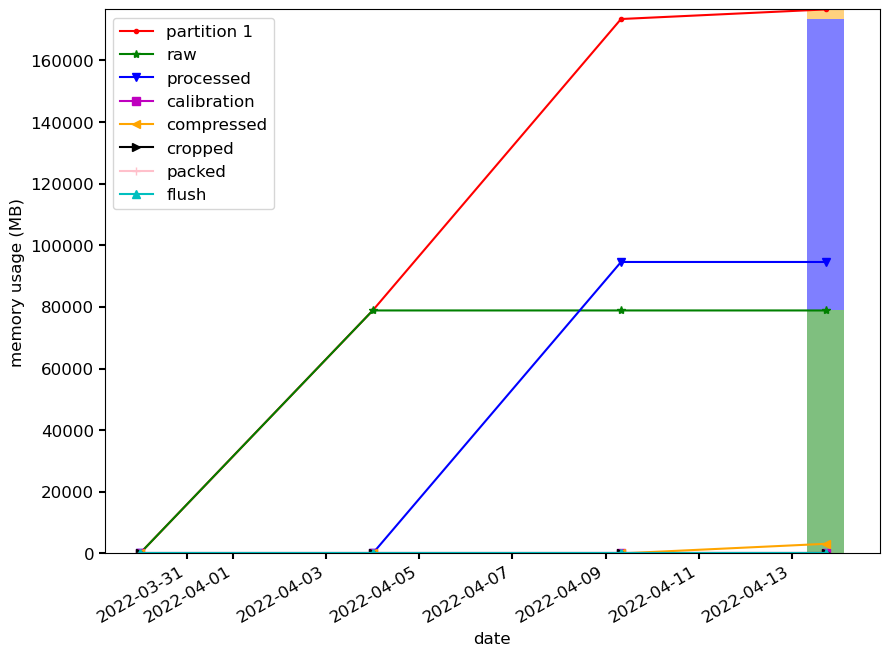

In [17]:
# t0 = datetime.datetime.fromisoformat('2021-09-02T10:00:00')
# t1 = datetime.datetime.fromisoformat('2021-09-02T15:00:00')
# phi = PHI_MEMORY(t0)
# a = PHI_MODE('HRT')
# kw = a.observation(t0,t1,5); phi.saving(1,**kw)
# kw = a.processing(t1,ndata=10,partialStore=0x00,level='raw'); phi.saving(1,**kw)
# kw = a.compressing(t1+datetime.timedelta(days=3), nbits = 6, ndata = 10,level='proc'); phi.saving(1,**kw)
# kw = a.processing(t1+datetime.timedelta(days=4),ndata=15,partialStore=0x00,level='raw'); phi.saving(1,**kw)
# kw = a.compressing(t1+datetime.timedelta(days=10), nbits = 6, ndata = 10,level='proc'); phi.saving(1,**kw)
# # kw = a.packing(t1+datetime.timedelta(days=20), ndata=5, level='raw'); phi.saving(1,**kw)
# # kw = a.cropping(t1+datetime.timedelta(days=20), crop=2, ndata=5, level='proc'); phi.saving(1,**kw)
# kw = a.packing(t1+datetime.timedelta(days=20), ndata=5, level='proc'); phi.saving(1,**kw)

# # kw = a.processing(t1+datetime.timedelta(days=25),ndata=4,partialStore=0x00,level='raw.crop'); phi.saving(1,**kw)
# kw = a.compressing(t1+datetime.timedelta(days=30),nbits=6,ndata=5,level='proc.pack'); phi.saving(1,**kw)

# new, kw = a.extract(t1+datetime.timedelta(days=31),level='compr.pack'); phi.saving(1,**kw)

phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-30T00:00:00'))
t0 = datetime.datetime.fromisoformat('2022-03-31T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-04-04T00:00:00')
a = PHI_MODE('HRT')
kw = a.observation(t0,t1,cadence=30,shape=(2048,2048,4,6)); phi.saving(1,**kw)
# kw = a.cropping(t1, crop=2, ndata=-1, level='raw'); phi.saving(1,**kw)
kw = a.processing(a.raw.end,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(1,**kw)
kw = a.compressing(a.proc.end, nbits = 6, ndata = -1,level='proc'); phi.saving(1,**kw)

# print(phi.part1.history)
print('amount of processed-compressed data + metadata:',round(phi.part1.compr,1), 'MB')
print('number of datasets:',a.raw.n_datasets)
print('number of outputs:',a.proc.n_outputs)

phi.plot(1,bar=True)

# Synoptic + 

amount of compressed data + metadata: 1489.2 MB
number of datasets: 336


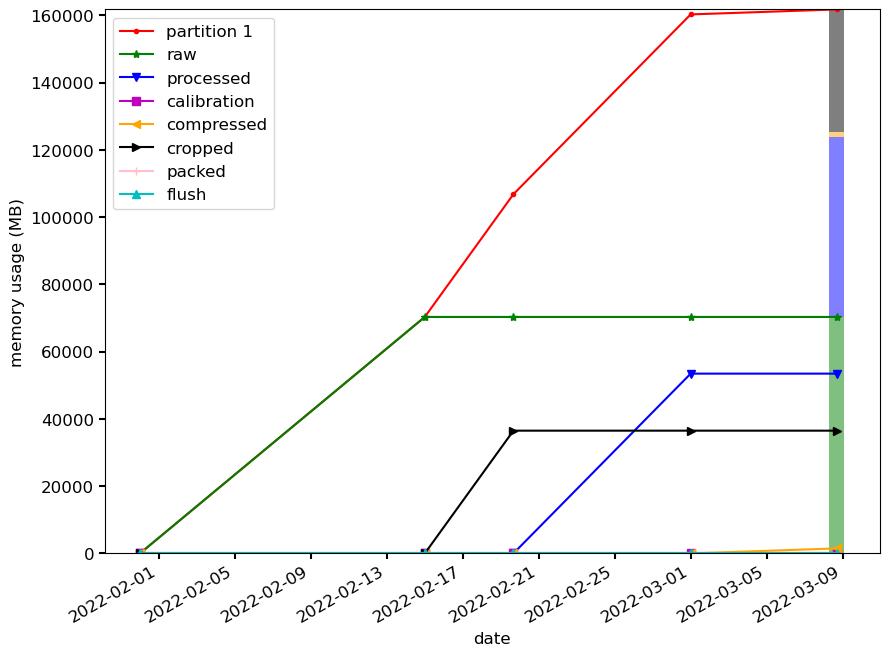

In [183]:
phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-01-31T00:00:00'))

#1 hour cadence, 14 days, 1024x1024
t0 = datetime.datetime.fromisoformat('2022-02-01T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-02-15T00:00:00')
a0 = PHI_MODE('FDT')
kw = a0.observation(t0,t1,cadence=60*1,shape=(1024,2048,4,6)); phi.saving(1,**kw)

t0 = a0.raw.end
kw = a0.cropping(t0,ndata=-1,crop=[1,2],level='raw'); phi.saving(1,**kw)
# kw = a0.packing(a0.raw.crop.end,ndata=-1,level='raw.crop'); phi.saving(1,**kw)
# kw = a0.compressing(a0.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(1,**kw)

kw = a0.processing(a0.raw.crop.end,ndata=-1,nout=5,partialStore=0x00,level='raw.crop'); phi.saving(1,**kw)
kw = a0.compressing(a0.proc.crop.end, nbits = 6, ndata = -1,level='proc.crop'); phi.saving(1,**kw)

print('amount of compressed data + metadata:',round(phi.part1.compr,1), 'MB')
print('number of datasets:',a0.raw.n_datasets)
phi.plot(1,bar=True)

# METIS SOOPs 

amount of compressed data + metadata: 311.6 MB
number of datasets: 32
amount of memory usage: 28166.7 MB


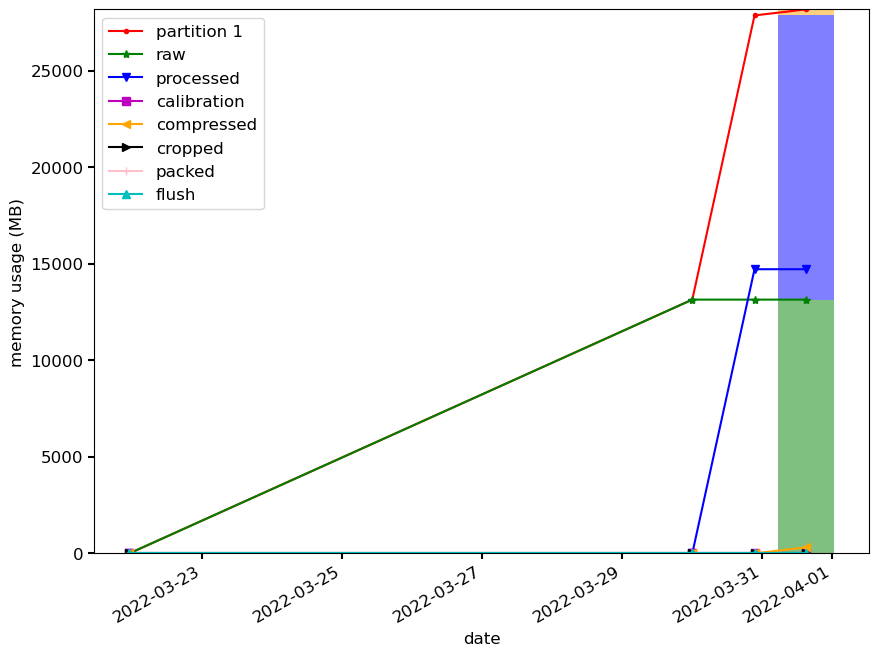

In [20]:
phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-21T23:00:00'))

#6 hour cadence, 8 days, 1024x1024
t0 = datetime.datetime.fromisoformat('2022-03-22T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-03-30T00:00:00')
a0 = PHI_MODE('FDT')
kw = a0.observation(t0,t1,cadence=60*6,shape=(2048,2048,4,6)); phi.saving(1,**kw)

t0 = a0.raw.end
# kw = a0.cropping(t0,ndata=-1,crop=[1,2],level='raw'); phi.saving(1,**kw)
# kw = a0.packing(a0.raw.crop.end,ndata=-1,level='raw.crop'); phi.saving(1,**kw)
# kw = a0.compressing(a0.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(1,**kw)

kw = a0.processing(a0.raw.end,ndata=-1,nout=3,partialStore=0x00,level='raw'); phi.saving(1,**kw)
kw = a0.compressing(a0.proc.end, nbits = 6, ndata = -1,level='proc'); phi.saving(1,**kw)

print('amount of compressed data + metadata:',round(phi.part1.compr,1), 'MB')
print('number of datasets:',a0.raw.n_datasets)
print('amount of memory usage:',round(phi.part1.occu,1), 'MB')

phi.plot(1,bar=True)

In [200]:
(2048*2048*5*5/8e6 + 0.1*5)*32
# a0.compr.this_run

435.4304

# Global Helioseismology

230 GB + 200 GB
download 15 GB

amount of compressed data + metadata: 15625.4 MB
number of datasets: 5760


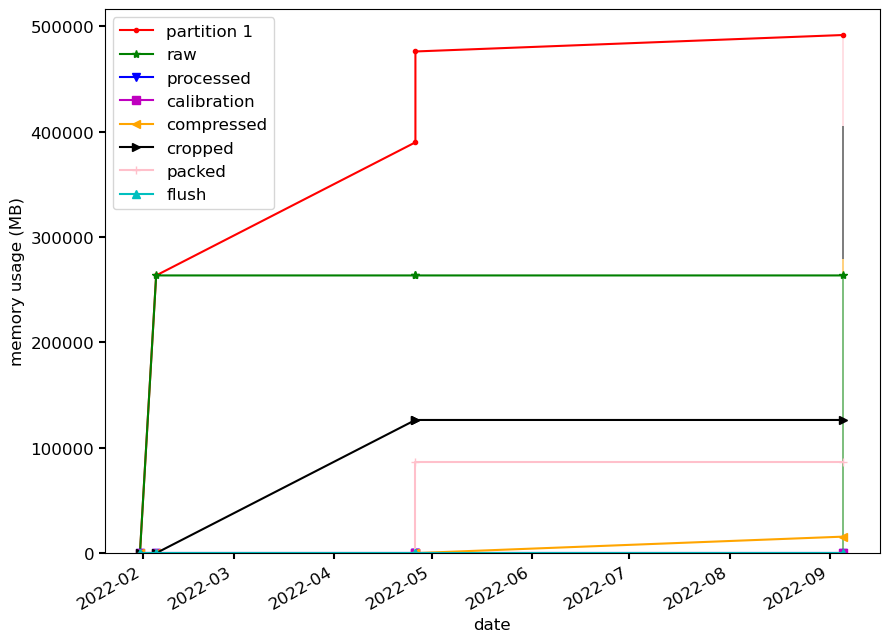

In [158]:
phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-01-31T00:00:00'))

#High cadence, 4 days, helio
t0 = datetime.datetime.fromisoformat('2022-02-01T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-02-05T00:00:00')
a0 = PHI_MODE('FDT')
kw = a0.observation(t0,t1,cadence=1,shape=(768,2048,1,6)); phi.saving(1,**kw)

t0 = a0.raw.end
kw = a0.cropping(t0,ndata=-1,crop=[1,2048/756],level='raw'); phi.saving(1,**kw)
kw = a0.packing(t0,ndata=-1,level='raw.crop'); phi.saving(1,**kw)

kw = a0.compressing(a0.raw.crop.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(1,**kw)

print('amount of compressed data + metadata:',round(phi.part1.compr,1), 'MB')
print('number of datasets:',a0.raw.n_datasets)
phi.plot(1,bar=True)

In [175]:
t0 = datetime.datetime.fromisoformat('2021-09-02T10:00:00')
t1 = datetime.datetime.fromisoformat('2021-09-02T15:00:00')
phi = PHI_MEMORY(t0)
a = PHI_MODE('HRT')
kw = a.observation(t0,t1,5); phi.saving(1,**kw)
kw = a.processing(t1,ndata=10,partialStore=0x00,level='raw'); phi.saving(1,**kw)
kw = a.compressing(t1+datetime.timedelta(days=3), nbits = 6, ndata = 10,level='proc'); phi.saving(1,**kw)
kw = a.processing(t1+datetime.timedelta(days=4),ndata=15,partialStore=0x00,level='raw'); phi.saving(1,**kw)
kw = a.compressing(t1+datetime.timedelta(days=10), nbits = 6, ndata = 10,level='proc'); phi.saving(1,**kw)
# kw = a.packing(t1+datetime.timedelta(days=20), ndata=5, level='raw'); phi.saving(1,**kw)
# kw = a.cropping(t1+datetime.timedelta(days=20), crop=2, ndata=5, level='proc'); phi.saving(1,**kw)
kw = a.packing(t1+datetime.timedelta(days=20), ndata=5, level='proc'); phi.saving(1,**kw)

# kw = a.processing(t1+datetime.timedelta(days=25),ndata=4,partialStore=0x00,level='raw.crop'); phi.saving(1,**kw)
kw = a.compressing(t1+datetime.timedelta(days=30),nbits=6,ndata=5,level='proc.pack'); phi.saving(1,**kw)

new, kw = a.extract(t1+datetime.timedelta(days=31),level='compr.pack'); phi.saving(1,**kw)

phi.part1.history

{'occu': [0,
  24639.19104,
  819.4304,
  557.2864,
  1229.1455999999998,
  557.2864,
  409.7152,
  278.6432,
  11.145728],
 'raw': [0, 24639.19104, 0, 0, 0, 0, 0, 0, 0],
 'proc': [0, 0, 819.4304, 0, 1229.1455999999998, 0, 0, 0, 11.145728],
 'compr': [0, 0, 0, 557.2864, 0, 557.2864, 0, 278.6432, 0],
 'crop': [0, 0, 0, 0, 0, 0, 0, 0, 0],
 'cal': [0, 0, 0, 0, 0, 0, 0, 0, 0],
 'flush': [0, 0, 0, 0, 0, 0, 0, 0, 0],
 'pack': [0, 0, 0, 0, 0, 0, 409.7152, 0, 0],
 'start': [datetime.datetime(2021, 9, 2, 10, 0),
  datetime.datetime(2021, 9, 2, 10, 0),
  datetime.datetime(2021, 9, 2, 15, 0),
  datetime.datetime(2021, 9, 5, 15, 0),
  datetime.datetime(2021, 9, 6, 15, 0),
  datetime.datetime(2021, 9, 12, 15, 0),
  datetime.datetime(2021, 9, 22, 15, 0),
  datetime.datetime(2021, 10, 2, 15, 0),
  datetime.datetime(2021, 10, 3, 15, 0)],
 'end': [datetime.datetime(2021, 9, 2, 10, 0),
  datetime.datetime(2021, 9, 2, 15, 0),
  datetime.datetime(2021, 9, 2, 20, 30),
  datetime.datetime(2021, 9, 5, 20, 30

In [1]:
import DClibs as DC
import numpy as np



SyntaxError: invalid syntax (__init__.py, line 1)

Dear Daniele,

here are some numbers about the onboard data handling:

accumulation:
=============
all data are accumulated to 32 bits; we can read out images of size (x=2048,y=y1...y2); we have two extra rows (2048 and 2049) which are masked and read out only for dark field generation

processing pipeline:
====================
- everything is done in 32bits; except the RTE inverted results are stored in 16bits
- with option partialStore=0x00 only 1 intermediate result will be stored at 32bits; it is the break between the linear and the parallel part of the pipeline (usually after the prefilter correction)
- with option partialStore=0xFF all intermediate results are stored in 32bits (see document [SOL-PHI-MPS-OP3100-SP-2](https://www2.mps.mpg.de/services/proton/phi/docdb/php/filemgr.php?cmd=DownloadPdf) in DocDB)

cropping:
=========
crops to a certain size (limited to power of 2); digital depth does not change

packing:
========
as CCSDS compression can only deal with 16-bit data this function keeps only the 16 most significant bits.

extracting:
==========
extracts single images from a dataset; copies and extends the metadata

compression:
============
- ZLIB: is the lossless S/W compression of the RTEMS operating system; gains about 10-20% for our data
- CCSDS: we have so far available the following configurations: lossless, 6, 5, 4, 3.2 bits/pixel
- ZLIB and CCSDS can be combined; we did not use it a lot; but could be helpful; it mainly helps in compressing the metadata.
- compression will be only applied while flushing the data to the S/C


Example:
- 1 full raw dataset uses 2048x2048x32bis x 24images = 402.6MB + 1 memory bock (8MB) of metadata
- processing with partialStore=0x00 would produce one intermediate dataset (402MB+metadata) + 2048x2048x16bits x 5 images = 41.9MB + metadata
(using longitudinal mode results only in 3 final images)
- processing with partialStore=0xFF would produce 5 intermediate datasets + 1 RTE result + 6 metadata files
- cropping raw data produces e.g. 1024x1024x32bits x 24 images = 106.6MB + metadata
- packing cropped data produces 1024x1024x16bits x 24 images = 50.3MB + metadata;
- flushing cropped+packed raw data uses 18.9MB + metadata (compressed to 6 bits)

Hope this helps,
best regards,
Johann 